# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
x_test = pd.read_csv('x_test_score.csv')
x_train = pd.read_csv('x_train_balanced_score.csv')
y_test = pd.read_csv('y_test_score.csv')
y_train = pd.read_csv('y_train_balanced_score.csv')

In [3]:
x_test.shape


(41, 7)

In [4]:
y_test.shape

(41, 1)

In [5]:
y_test.columns

Index(['Credit_Score_encoded'], dtype='object')

In [6]:
x_train.shape

(252, 7)

In [7]:
y_train.shape

(252, 1)

In [8]:
print((y_train['Credit_Score_encoded'].value_counts(normalize=True)))

Credit_Score_encoded
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

a aplicação do modelo consiste primeiramente em coletar e tratar os dados, seguindo então para divisão desse em treino e teste. Após isso é necessário escolher o algoritmo que ira constituir nosso modelo (Gini, Entropoia). Como base nesse modelo iremos realizar testes para avaliar o modelo, como acurácia, f1-score e recall, medindo a precisão do modelo e avaliando a necessidade ou não de ajustes. Existem varias formas de melhorar o modelo, mas as principais e vistas em aula seriam ajustar a profundidade da arvore, podando o numero minimo ou maximo de divisões; filtrar o dataset com as principais variaveis; balancear os dados; 

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [10]:
arvore_churn = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [34]:
previsoes = arvore_churn.predict(x_test)
relatorio = classification_report(y_test,previsoes)
print(relatorio)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [12]:
#O modelo apresente um grande nivles de assertividade nas 3 métricas de avaliação. O modelo peca mais em avaliar qual é o score errado de '0'/'Average'

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

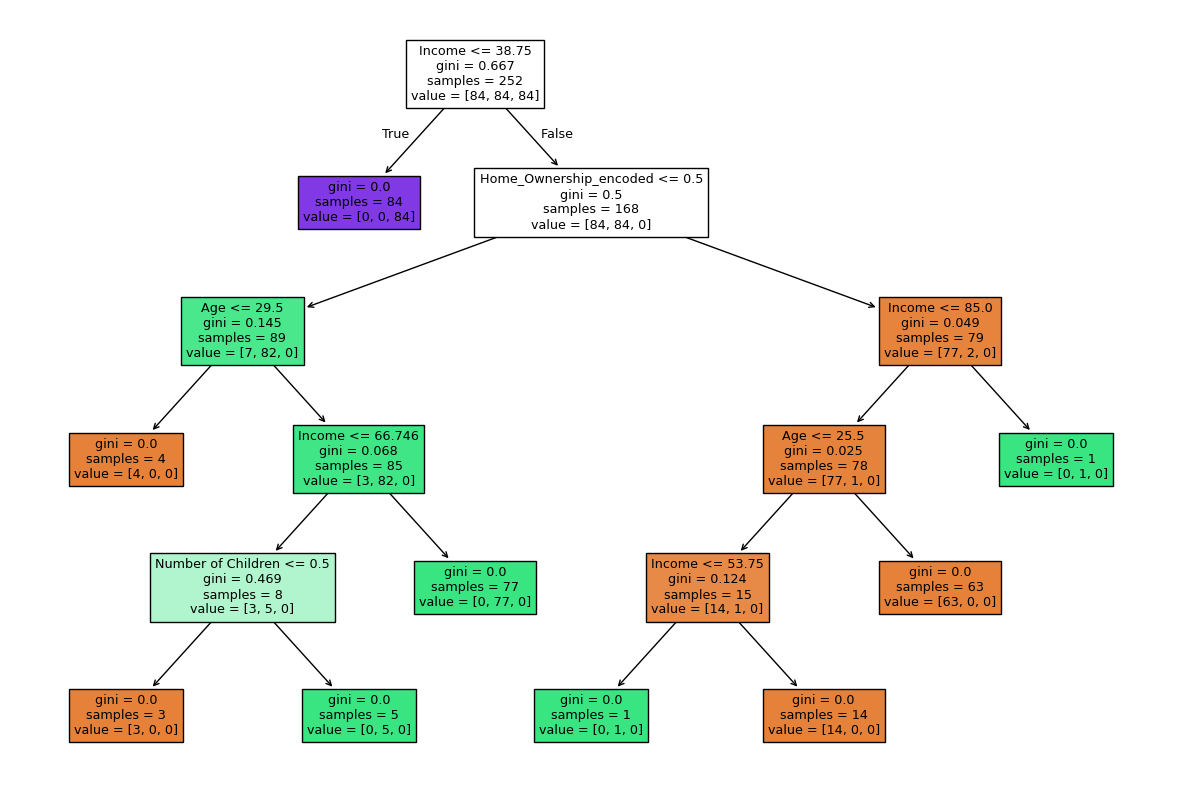

In [13]:
plt.figure(figsize=(15,10))
plot_tree(arvore_churn, filled=True, feature_names=x_train.columns)
plt.show()

# 6) Identifique as 2 principais features do modelo.


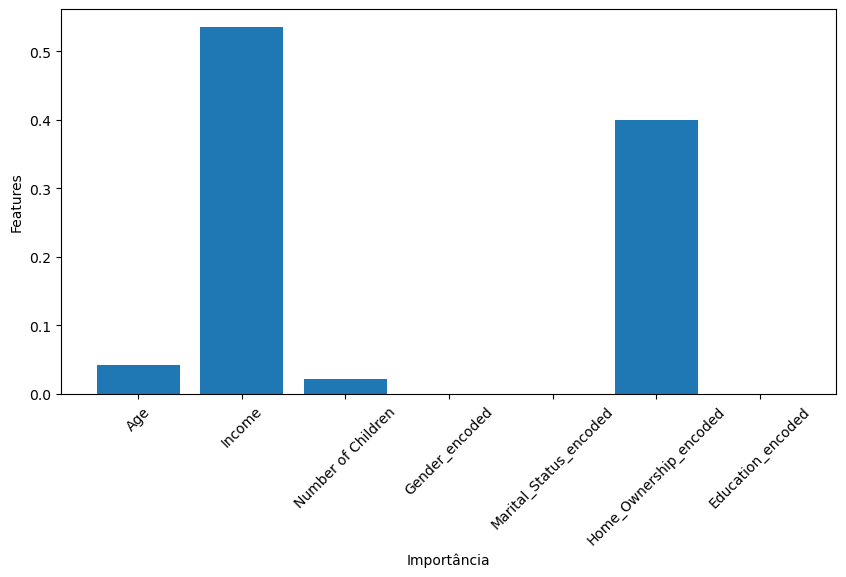

In [14]:
importancia = arvore_churn.feature_importances_
nomes = x_train.columns

plt.figure(figsize=(10,5))
plt.bar(nomes,importancia)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

In [15]:
#Renda e casa propria são as variáveis mais importantes para o modelo.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [16]:
x_train_reduzido = x_train[['Income','Home_Ownership_encoded']]
x_test_reduzido = x_test[['Income','Home_Ownership_encoded']]

In [17]:
arvore_churn_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn_reduzido.fit(x_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
previsoes_reduzido = arvore_churn_reduzido.predict(x_test_reduzido)
relatorio_reduzido = classification_report(y_test,previsoes_reduzido)
print(relatorio_reduzido)
print(relatorio)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.97      0.97      0.97        29
           2       1.00      1.00      1.00         6

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [19]:
#o resultado apresentado no modelo reduzido é um pouco periodo, apresentando indicies piores, principalmente na métrica de 'recall'

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [23]:
naive_churn = GaussianNB()
naive_churn.fit(x_train, y_train)

C:\Users\thiag\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
pred_train = naive_churn.predict(x_train)
relatorio_naive = classification_report(y_train,pred_train)
print(relatorio_naive)
print(relatorio)

              precision    recall  f1-score   support

           0       0.98      0.71      0.83        84
           1       0.92      0.98      0.95        84
           2       0.82      1.00      0.90        84

    accuracy                           0.90       252
   macro avg       0.91      0.90      0.89       252
weighted avg       0.91      0.90      0.89       252

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



ambos apresentam boa % em ambos os testes, contudo o as medias da arvore de decisão são maiores, principalmente no f1-score